# 1.1.2. What region/location do most of the errors come from?
Questions being answered in this notebook.
>- [x] ...

In [1]:
import pandas as pd

## Loading Lightning Error

In [2]:
lightning_error = pd.read_csv("../../data/Salesforce/Salesforce/ELF/LightningError/2022-06-05_LightningError.csv")

In [3]:
lightning_error.shape

(1286, 39)

### Getting *Report_Id* by *Page_Url*

In [4]:
lightning_error = lightning_error.dropna(subset = ['PAGE_URL'])

In [5]:
lightning_error.shape

(1282, 39)

In [6]:
run_report_api_resource = "/lightning/r/"

def get_report_info_from_endpoint(page_url):
    if not(pd.isnull(page_url)) == True: 
        if page_url.startswith(run_report_api_resource):
            uri = page_url.split(run_report_api_resource)
            if len(uri) >= 2:
                report_type, report_id_derived = uri[1].split("/")[:2]
                return report_type, report_id_derived

In [7]:
lightning_error['REPORT_INFO_DERIVED'] = lightning_error.PAGE_URL.apply(get_report_info_from_endpoint)

In [8]:
lightning_error['REPORT_TYPE_DERIVED'] = lightning_error.REPORT_INFO_DERIVED.str[0]

In [9]:
lightning_error['REPORT_ID_DERIVED'] = lightning_error.REPORT_INFO_DERIVED.str[1]

In [10]:
lightning_error.shape

(1282, 42)

## Loading Active Reports

In [11]:
active_reports = pd.read_csv("../../datasets/active_reports.csv", low_memory=False)

In [12]:
active_reports.shape

(38285, 51)

## Merging Lightning Error and Active Reports

In [13]:
interest_columns = ['UI_EVENT_ID', 'CLIENT_GEO', 'REPORT_ID_DERIVED_x']

In [14]:
ltng_full_reports = pd.merge(left=active_reports, right=lightning_error, left_on="Id", right_on="REPORT_ID_DERIVED")

In [15]:
list(ltng_full_reports.columns)

['CreatedById',
 'CreatedDate',
 'Description',
 'DeveloperName',
 'FolderName',
 'Format',
 'Id',
 'IsDeleted',
 'LastModifiedById',
 'LastModifiedDate',
 'LastReferencedDate',
 'LastRunDate',
 'LastViewedDate',
 'Name',
 'NamespacePrefix',
 'OwnerId',
 'ReportTypeApiName',
 'SystemModstamp',
 'EVENT_TYPE_x',
 'TIMESTAMP_x',
 'REQUEST_ID_x',
 'ORGANIZATION_ID_x',
 'USER_ID_x',
 'RUN_TIME',
 'CPU_TIME',
 'URI',
 'SESSION_KEY_x',
 'LOGIN_KEY_x',
 'USER_TYPE_x',
 'REQUEST_STATUS',
 'DB_TOTAL_TIME',
 'ENTITY_NAME',
 'DISPLAY_TYPE',
 'RENDERING_TYPE',
 'REPORT_ID',
 'ROW_COUNT',
 'NUMBER_EXCEPTION_FILTERS',
 'NUMBER_COLUMNS',
 'AVERAGE_ROW_SIZE',
 'SORT',
 'DB_BLOCKS',
 'DB_CPU_TIME',
 'NUMBER_BUCKETS',
 'TIMESTAMP_DERIVED_x',
 'USER_ID_DERIVED_x',
 'CLIENT_IP_x',
 'URI_ID_DERIVED',
 'REPORT_ID_DERIVED_x',
 'ORIGIN',
 'IsActiveSinceCreation',
 'IsActiveSinceLastModification',
 'EVENT_TYPE_y',
 'TIMESTAMP_y',
 'REQUEST_ID_y',
 'ORGANIZATION_ID_y',
 'USER_ID_y',
 'CLIENT_ID',
 'SESSION_KEY_y

Removing useless columns 

In [16]:
ltng_full_reports = ltng_full_reports[interest_columns]

In [17]:
ltng_full_reports.shape

(78804, 3)

Renaming ***REPORT_ID_DERIVED_x*** to ***REPORT_ID_DERIVED***

In [18]:
ltng_full_reports.rename(columns={'REPORT_ID_DERIVED_x': 'REPORT_ID_DERIVED'}, inplace = True)

In [19]:
ltng_full_reports.head()

,UI_EVENT_ID,CLIENT_GEO,REPORT_ID_DERIVED
0,ltng:error,Australia/New South Wales,00O0b000004kTazEAE
1,ltng:error,United States/null,00O0b000004kTazEAE
2,ltng:error,Australia/New South Wales,00O0b000004kTazEAE
3,ltng:error,United States/null,00O0b000004kTazEAE
4,ltng:error,Australia/New South Wales,00O0b000004kTazEAE


## Loaging Lightning PageView

In [20]:
pageview_logs = pd.read_csv("../../data/Salesforce/Salesforce/ELF/LightningPageView/2022-06-05_LightningPageView.csv", 
                            low_memory=False)

In [21]:
interest_columns = ['PAGE_URL', 'DURATION', 'EFFECTIVE_PAGE_TIME']

In [22]:
pageview_ept = pageview_logs[interest_columns]

In [23]:
pageview_ept.shape

(751610, 3)

### Getting *Report_Id* by *Page_Url*

In [24]:
pageview_ept = pageview_ept.dropna(subset = ['PAGE_URL'])

In [25]:
pageview_ept.shape

(749318, 3)

In [26]:
pageview_ept['REPORT_INFO_DERIVED'] = pageview_ept.PAGE_URL.apply(get_report_info_from_endpoint)

In [27]:
pageview_ept['REPORT_TYPE_DERIVED'] = pageview_ept.REPORT_INFO_DERIVED.str[0]

In [28]:
pageview_ept['REPORT_ID_DERIVED'] = pageview_ept.REPORT_INFO_DERIVED.str[1]

In [29]:
pageview_ept = pageview_ept.dropna(subset=['REPORT_ID_DERIVED'])

Applying problematic filters

In [30]:
pageview_ept = pageview_ept[pageview_ept.EFFECTIVE_PAGE_TIME.isna()]

In [31]:
pageview_ept = pageview_ept[pageview_ept.DURATION > 60000] # 60s -> 60000ms

In [32]:
pageview_ept.head()

,PAGE_URL,DURATION,EFFECTIVE_PAGE_TIME,REPORT_INFO_DERIVED,REPORT_TYPE_DERIVED,REPORT_ID_DERIVED
890,/lightning/r/Call_Transcript__c/a7Z2R000002Q33...,166655.0,NaN,"(Call_Transcript__c, a7Z2R000002Q33NUAS)",Call_Transcript__c,a7Z2R000002Q33NUAS
1843,/lightning/r/Report/00O0b000006iNwdEAE/view,129212.0,NaN,"(Report, 00O0b000006iNwdEAE)",Report,00O0b000006iNwdEAE
2363,/lightning/r/WorkOrder/0WO6P00000273YqWAI/view...,70994.0,NaN,"(WorkOrder, 0WO6P00000273YqWAI)",WorkOrder,0WO6P00000273YqWAI
3254,/lightning/r/Contact/0036P000004Rl3nQAC/view?w...,68522.0,NaN,"(Contact, 0036P000004Rl3nQAC)",Contact,0036P000004Rl3nQAC
4340,/lightning/r/Task/00T6P00000HboKyUAJ/view?ws=%...,92596.0,NaN,"(Task, 00T6P00000HboKyUAJ)",Task,00T6P00000HboKyUAJ


## Merging to get active and problematic reports

In [33]:
active_and_problematic_reports = pd.merge(left=ltng_full_reports, right=pageview_ept, on='REPORT_ID_DERIVED')

In [34]:
active_and_problematic_reports.shape

(1217052, 8)

In [35]:
active_and_problematic_reports.head()

,UI_EVENT_ID,CLIENT_GEO,REPORT_ID_DERIVED,PAGE_URL,DURATION,EFFECTIVE_PAGE_TIME,REPORT_INFO_DERIVED,REPORT_TYPE_DERIVED
0,ltng:error,Australia/New South Wales,00O0b000004kTazEAE,/lightning/r/Report/00O0b000004kTazEAE/view?qu...,60051.0,NaN,"(Report, 00O0b000004kTazEAE)",Report
1,ltng:error,Australia/New South Wales,00O0b000004kTazEAE,/lightning/r/Report/00O0b000004kTazEAE/view?qu...,61267.0,NaN,"(Report, 00O0b000004kTazEAE)",Report
2,ltng:error,Australia/New South Wales,00O0b000004kTazEAE,/lightning/r/Report/00O0b000004kTazEAE/view,333616.0,NaN,"(Report, 00O0b000004kTazEAE)",Report
3,ltng:error,Australia/New South Wales,00O0b000004kTazEAE,/lightning/r/Report/00O0b000004kTazEAE/view,112760.0,NaN,"(Report, 00O0b000004kTazEAE)",Report
4,ltng:error,Australia/New South Wales,00O0b000004kTazEAE,/lightning/r/Report/00O0b000004kTazEAE/view?qu...,62413.0,NaN,"(Report, 00O0b000004kTazEAE)",Report


---

## Analyzing regions where most of the errors come from

Grouping customer location by quantity of errors

In [36]:
active_and_problematic_reports_group = active_and_problematic_reports.groupby(['CLIENT_GEO']).agg({'UI_EVENT_ID': 'count'})

Renaming ***UI_EVENT_ID*** to ***UI_EVENT_ID_COUNT***

In [37]:
active_and_problematic_reports_group.rename(columns={'UI_EVENT_ID': 'UI_EVENT_ID_COUNT'}, inplace = True)

In [38]:
active_and_problematic_reports_group

,UI_EVENT_ID_COUNT
CLIENT_GEO,
Australia/New South Wales,167625
India/National Capital Territory of Delhi,9144
United States/Texas,295296
United States/Utah,577362
United States/null,167625


In [39]:
active_and_problematic_reports_group.reset_index(inplace=True)

In [40]:
active_and_problematic_reports_group

,CLIENT_GEO,UI_EVENT_ID_COUNT
0,Australia/New South Wales,167625
1,India/National Capital Territory of Delhi,9144
2,United States/Texas,295296
3,United States/Utah,577362
4,United States/null,167625


Getting the countries

In [42]:
list_of_client_geo = active_and_problematic_reports_group['CLIENT_GEO'].tolist()
list_of_ui_event_id_count = active_and_problematic_reports_group['UI_EVENT_ID_COUNT'].tolist()

In [51]:
list_of_countries = []

for client_geo in list_of_client_geo:
    region = client_geo.split("/")
    list_of_countries.append(region[0])

print(list_of_countries)

['Australia', 'India', 'United States', 'United States', 'United States']


In [53]:
dict_of_countries = {}

for country in list_of_countries:
    dict_of_countries[country] = 0
    
print(dict_of_countries)

{'Australia': 0, 'India': 0, 'United States': 0}


In [62]:
for i in range(len(list_of_client_geo)):
    dict_of_countries[list_of_countries[i]] += list_of_ui_event_id_count[i]

list_countries = []
list_count_errors = []

for index, key in enumerate(dict_of_countries):
    list_countries.append(key)
    list_count_errors.append(dict_of_countries[key])

print(list_countries, list_count_errors)

dict_keys(['Australia', 'India', 'United States'])
dict_values([838125, 45720, 5201415])
['Australia', 'India', 'United States'] [838125, 45720, 5201415]


Viewing the data

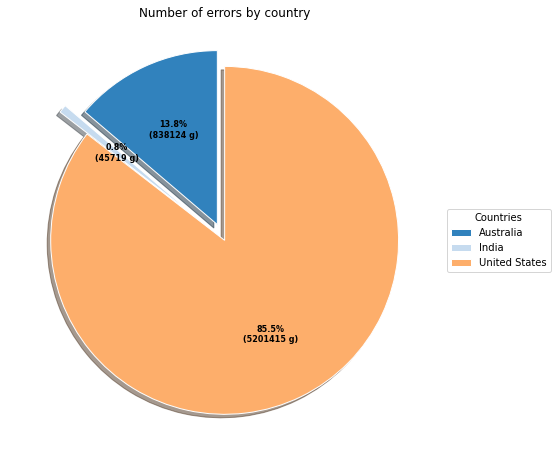

In [70]:
import numpy as np 
import matplotlib.pyplot as plt 

explode = (0.1, 0.2, 0.0) 
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(list_countries))*3)
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 

def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
fig, ax = plt.subplots(figsize =(12, 8))

wedges, texts, autotexts = ax.pie(list_count_errors,  
                                  autopct = lambda pct: func(pct, list_count_errors), 
                                  explode = explode,  
                                  shadow = True, 
                                  colors = outer_colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 

ax.legend(wedges, list_countries, 
          title ="Countries", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Number of errors by country") 
plt.show()